<a href="https://colab.research.google.com/github/yukki-github/WiFi-Profile-eduroam/blob/master/Ch2_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplfinance

     |████████████████████████████████| 62 kB 577 kB/s 


In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [4]:
df = get_stock_data(7203).tail(100)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-26,2100.0,2109.5,2065.0,2074.5,22432100
2021-11-29,2031.0,2041.0,2005.0,2012.0,27978900
2021-11-30,2051.5,2061.5,1999.0,2001.0,42639000
2021-12-01,2007.5,2074.0,2007.0,2045.5,25290500
2021-12-02,2030.0,2051.0,2005.0,2045.5,24357000


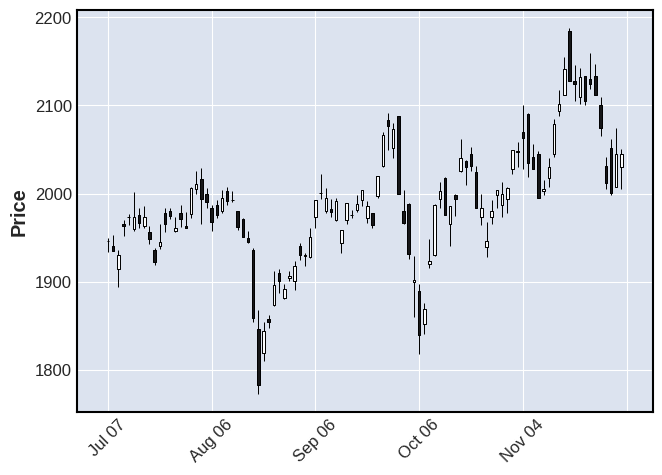

In [6]:
import mplfinance as mpf

df = get_stock_data(7203).tail(100)
mpf.plot(df, type='candle')

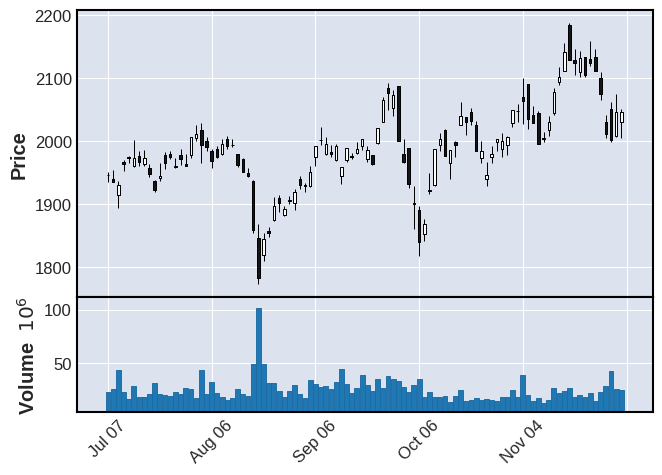

In [7]:
mpf.plot(df, type='candle', volume=True)

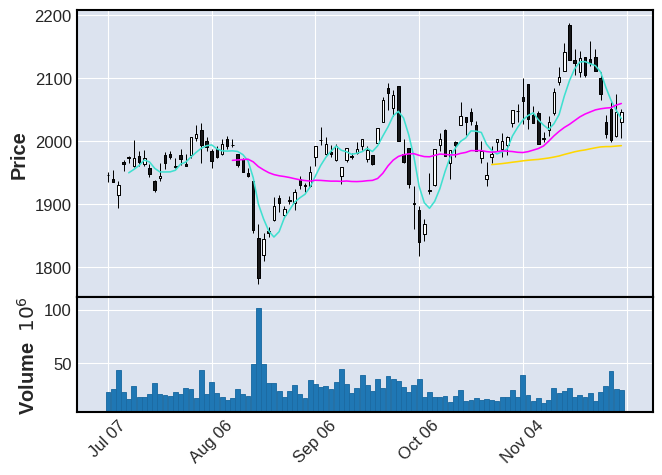

In [8]:
mpf.plot(df, type='candle', mav=(5, 25, 75), volume=True)

In [9]:
!pip install pyti

In [10]:
from pyti.bollinger_bands import upper_bollinger_band as bb_up
from pyti.bollinger_bands import middle_bollinger_band as bb_mid
from pyti.bollinger_bands import lower_bollinger_band as bb_low

data = df['Close'].tolist()  # 終値をリスト型に変換
period = 25
bb_up = bb_up(data, period)    # バンド上限
bb_mid = bb_mid(data, period)  # ミッドバンド
bb_low = bb_low(data, period)  # バンド下限
df['bb_up']  = bb_up
df['bb_mid'] = bb_mid
df['bb_low'] = bb_low

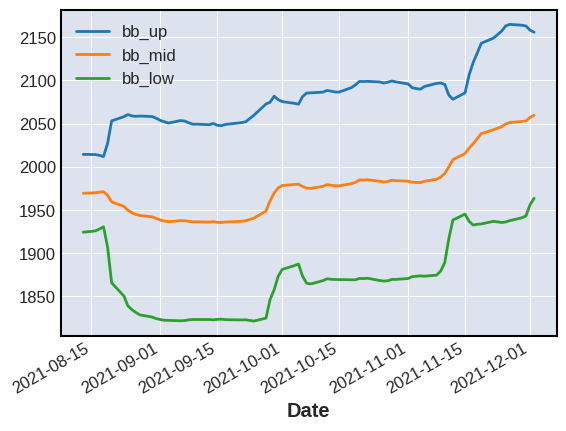

In [11]:
df[['bb_up', 'bb_mid', 'bb_low']].plot()

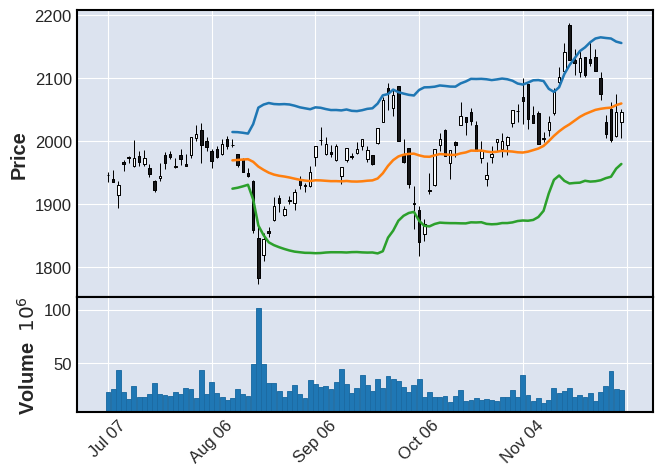

In [12]:
apd = mpf.make_addplot(df[['bb_up', 'bb_mid', 'bb_low']])
mpf.plot(df, type='candle', addplot=apd, volume=True)